In [2]:
'''
載入路透社資料集
'''
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 2s 1us/step


In [ ]:
'''
文字解碼新聞專欄
'''
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, 'class:') for i in train_data[0]])

In [14]:
'''
將資料加以編碼
'''
import numpy as np

def vectorize_sequences(sequences, dimension = 10000): # 此參數將傳入2層的list
    results = np.zeros((len(sequences), dimension)) # 建立全為0的矩陣,其形狀為(len(sequences), dimension),其中len(sequences)為樣本數
    for i, sequence in enumerate(sequences): # 用enumerate()為每個子串列編號,編號會存到i, 子串列存到sequence
        results[i, sequence] = 1. # 將results[i]中的多個元素(以sequence串列的每個元素值為索引)設為1.0
    return results

x_train = vectorize_sequences(train_data) # 將訓練資料向量化
x_test = vectorize_sequences(test_data) # 將測試資料向量化

# 標籤向量化
'''
寫法一
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimesion))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
'''

'''
寫法二
'''
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
'''
模型定義
'''
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) # 亦即將輸出46維的向量

In [16]:
'''
編譯模型
'''
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
'''
切片驗證資料集
'''
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
'''
訓練模型
'''
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 12s 2ms/step - loss: 2.4994 - acc: 0.4901 - val_loss: 1.6814 - val_acc: 0.6460
Epoch 2/20
7982/7982 [==============================] - 3s 421us/step - loss: 1.3911 - acc: 0.7040 - val_loss: 1.2782 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 3s 412us/step - loss: 1.0478 - acc: 0.7700 - val_loss: 1.1175 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 3s 412us/step - loss: 0.8238 - acc: 0.8282 - val_loss: 1.0220 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 3s 421us/step - loss: 0.6596 - acc: 0.8637 - val_loss: 0.9704 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 3s 433us/step - loss: 0.5251 - acc: 0.8930 - val_loss: 0.9207 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 4s 480us/step - loss: 0.4289 - acc: 0.9114 - val_loss: 0.9117 - val_acc: 0.8030
E

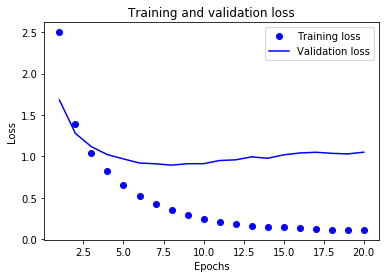

In [23]:
'''
繪製訓練和驗證的損失
'''
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values) + 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

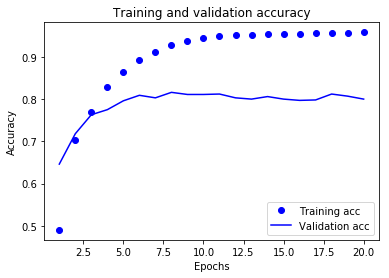

In [22]:
'''
繪製訓練和驗證的準確度
'''
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
'''
重新開始訓練模型
'''

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) # 亦即將輸出46維的向量

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 6s 750us/step - loss: 2.5407 - acc: 0.5227 - val_loss: 1.6803 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 3s 414us/step - loss: 1.3775 - acc: 0.7102 - val_loss: 1.2803 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 3s 410us/step - loss: 1.0221 - acc: 0.7780 - val_loss: 1.1356 - val_acc: 0.7490
Epoch 4/9
7982/7982 [==============================] - 3s 422us/step - loss: 0.8057 - acc: 0.8235 - val_loss: 1.0587 - val_acc: 0.7540
Epoch 5/9
7982/7982 [==============================] - 3s 419us/step - loss: 0.6453 - acc: 0.8611 - val_loss: 0.9770 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 4s 497us/step - loss: 0.5169 - acc: 0.8915 - val_loss: 0.9120 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 5s 581us/step - loss: 0.4161 - acc: 0.9142 - val_loss: 0.8978 - val_acc: 0.8220
Epoch 8

In [25]:
result

[1.0247645407835502, 0.7764915405695499]

In [26]:
'''
延伸實作: 嘗試多個隱藏層
'''
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) # 亦即將輸出46維的向量

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 8s 966us/step - loss: 2.4697 - acc: 0.4617 - val_loss: 1.6104 - val_acc: 0.6200
Epoch 2/20
7982/7982 [==============================] - 4s 453us/step - loss: 1.4312 - acc: 0.6823 - val_loss: 1.3201 - val_acc: 0.7020
Epoch 3/20
7982/7982 [==============================] - 4s 441us/step - loss: 1.1074 - acc: 0.7403 - val_loss: 1.1824 - val_acc: 0.7280
Epoch 4/20
7982/7982 [==============================] - 4s 439us/step - loss: 0.8788 - acc: 0.7969 - val_loss: 1.1505 - val_acc: 0.7340
Epoch 5/20
7982/7982 [==============================] - 5s 610us/step - loss: 0.7325 - acc: 0.8326 - val_loss: 1.0390 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 5s 592us/step - loss: 0.5780 - acc: 0.8732 - val_loss: 1.0974 - val_acc: 0.7550
Epoch 7/20
7982/7982 [==============================] - 4s 449us/step - loss: 0.4930 - acc: 0.8885 - val_loss: 1.0263 - val_acc: 0.7950


In [27]:
result

[1.4851876058858733, 0.7653606410867279]

In [28]:
'''
延伸實作: 嘗試一個隱藏層
'''
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(46, activation = 'softmax')) # 亦即將輸出46維的向量

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 803us/step - loss: 2.4962 - acc: 0.5631 - val_loss: 1.7563 - val_acc: 0.6680
Epoch 2/20
7982/7982 [==============================] - 4s 441us/step - loss: 1.4232 - acc: 0.7244 - val_loss: 1.3260 - val_acc: 0.7220
Epoch 3/20
7982/7982 [==============================] - 4s 488us/step - loss: 1.0477 - acc: 0.7861 - val_loss: 1.1270 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 5s 580us/step - loss: 0.8237 - acc: 0.8329 - val_loss: 1.0059 - val_acc: 0.7880
Epoch 5/20
7982/7982 [==============================] - 5s 590us/step - loss: 0.6649 - acc: 0.8681 - val_loss: 0.9414 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 4s 508us/step - loss: 0.5458 - acc: 0.8916 - val_loss: 0.8901 - val_acc: 0.8140
Epoch 7/20
7982/7982 [==============================] - 3s 419us/step - loss: 0.4503 - acc: 0.9095 - val_loss: 0.8607 - val_acc: 0.8220


In [29]:
result

[1.0672371625263353, 0.7898486197950154]

In [30]:
'''
延伸實作: 嘗試用更小的層, ex. 32 units or 128 units
'''
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) # 亦即將輸出46維的向量

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 8s 967us/step - loss: 3.1923 - acc: 0.4037 - val_loss: 2.5414 - val_acc: 0.5570
Epoch 2/20
7982/7982 [==============================] - 3s 391us/step - loss: 2.0908 - acc: 0.6377 - val_loss: 1.8182 - val_acc: 0.6450
Epoch 3/20
7982/7982 [==============================] - 3s 361us/step - loss: 1.5361 - acc: 0.7036 - val_loss: 1.4661 - val_acc: 0.6920
Epoch 4/20
7982/7982 [==============================] - 3s 359us/step - loss: 1.2339 - acc: 0.7446 - val_loss: 1.2773 - val_acc: 0.7240
Epoch 5/20
7982/7982 [==============================] - 3s 413us/step - loss: 1.0323 - acc: 0.7805 - val_loss: 1.1643 - val_acc: 0.7400
Epoch 6/20
7982/7982 [==============================] - 3s 364us/step - loss: 0.8845 - acc: 0.8087 - val_loss: 1.0804 - val_acc: 0.7650
Epoch 7/20
7982/7982 [==============================] - 3s 430us/step - loss: 0.7644 - acc: 0.8343 - val_loss: 1.0421 - val_acc: 0.7780


In [31]:
result

[1.1270889225328806, 0.7845057881207521]

In [32]:
'''
延伸實作: 嘗試用更大的層, ex. 128 units
'''
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) # 亦即將輸出46維的向量

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 10s 1ms/step - loss: 2.3322 - acc: 0.5517 - val_loss: 1.4440 - val_acc: 0.6910
Epoch 2/20
7982/7982 [==============================] - 7s 902us/step - loss: 1.1550 - acc: 0.7503 - val_loss: 1.1086 - val_acc: 0.7640
Epoch 3/20
7982/7982 [==============================] - 6s 770us/step - loss: 0.7950 - acc: 0.8312 - val_loss: 0.9824 - val_acc: 0.7900
Epoch 4/20
7982/7982 [==============================] - 5s 650us/step - loss: 0.5730 - acc: 0.8812 - val_loss: 0.8870 - val_acc: 0.8150
Epoch 5/20
7982/7982 [==============================] - 6s 704us/step - loss: 0.4236 - acc: 0.9124 - val_loss: 0.8719 - val_acc: 0.8180
Epoch 6/20
7982/7982 [==============================] - 6s 813us/step - loss: 0.3178 - acc: 0.9300 - val_loss: 0.9178 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 11s 1ms/step - loss: 0.2552 - acc: 0.9412 - val_loss: 0.8840 - val_acc: 0.8210
Ep

In [33]:
result

[1.2365807045387138, 0.7902938557966204]